# GRADED CHALLENGE 1

Hello! Welcome to my Notebook.

Notebook ini merupakan bagian dari tugas *Graded Challenge 1* yang dibuat oleh **Asta Zeska Dimitri** dari Batch **001-HCK**.

# INTRODUCTION

## Background

Sebagai fenomena luar biasa yang terjadi di zaman modern, pandemi Covid-19 ini tentu menarik perhatian banyak orang. Salah satu sisi positif yang bisa diambil adalah melimpah dan mudahnya publik dalam melihat ataupun mengakses data tentang Covid-19. Tidak hanya data di dalam negeri saja, tapi juga dari berbagai negara-negara lain. Sehingga untuk para Aspired Data Scientist seperti penulis, data tentang Covid-19 ini sangat cocok untuk digunakan sebagai materi latihan. Harapannya adalah selain menambah wawasan/skill analisis data, kita juga bisa mendapatkan informasi tentang kondisi pandemi Covid-19 pada saat ini.

## Problem Statement

- Berapa banyak penduduk yang terdampak pandemi Covid-19 ini?
- Berapa banyak korban dari pandemi Covid-19 ini?
- Apakah jumlah kasus terkonfirmasi berhubungan dengan banyaknya jumlah penduduk di suatu daerah?
- Apakah jumlah korban meninggal berhubungan dengan banyaknya kasus terkonfirmasi di suatu daerah?

## The Data

Untuk data yang digunakan kali ini adalah tabel `bigquery-public-data.covid19_jhu_csse_eu.summary` dari Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Data ini tersedia di *Google Cloud Platform* dan merupakan bagian dari *BigQuery Public Datasets*.
Untuk kolom tabel yang dipilih adalah province_state, country_region, date, confirmed, deaths, recovered, active.

Tabel diambil dengan menggunakan kode query dibawah ini:
```
SELECT province_state, country_region, date, confirmed, deaths, recovered, active

FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`
```

Kemudian disimpan dalam format (*.csv).

# DATA ANALYSIS

## Import Library
Memasukkan library-library yang dibutuhkan dalam pengolahan data ini seperti numpy, pandas, dan matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Data Loading and Overview
Melakukan proses load data ke dalam notebook ini. Sekaligus melakukan overview singkat untuk mengetahui gambaran awal dari data yang akan diolah.

In [2]:
df = pd.read_csv('h8dsft_P0GC1_Asta.csv')

Menjalankan beberapa fungsi yang bertujuan untuk overview singkat.

In [3]:
df.head(3)

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Mississippi,US,2022-01-16,3969.0,95.0,NaN,NaN
1,Mississippi,US,2022-01-16,3125.0,48.0,NaN,NaN
2,Mississippi,US,2022-01-16,6653.0,94.0,NaN,NaN


In [4]:
df.tail(3)

,province_state,country_region,date,confirmed,deaths,recovered,active
3420851,Arkansas,US,2022-02-19,3842.0,63.0,NaN,NaN
3420852,Arkansas,US,2022-02-19,5909.0,53.0,NaN,NaN
3420853,Arkansas,US,2022-02-19,18412.0,259.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420854 entries, 0 to 3420853
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   country_region  object 
 2   date            object 
 3   confirmed       float64
 4   deaths          float64
 5   recovered       float64
 6   active          float64
dtypes: float64(4), object(3)
memory usage: 182.7+ MB


In [6]:
df.shape

(3420854, 7)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
confirmed,3420835.0,53212.340093,420869.417490,-302844.0,547.0,2703.0,11854.0,33242582.0
deaths,3420412.0,871.170637,5631.735815,-178.0,7.0,45.0,177.0,624641.0
recovered,1435590.0,16361.765604,134176.376880,-854405.0,0.0,0.0,0.0,6399531.0
active,1427511.0,6556.531471,92861.259785,-6298082.0,55.0,471.0,2248.0,10877758.0


In [8]:
df.isnull().sum()

province_state     154365
country_region          1
date                    0
confirmed              19
deaths                442
recovered         1985264
active            1993343
dtype: int64

In [9]:
df['country_region'].value_counts()

US                            2824688
Russia                          66687
Japan                           39570
China                           29711
India                           29425
                               ...   
Hong Kong SAR                       1
Republic of Korea                   1
Iran (Islamic Republic of)          1
East Timor                          1
North Ireland                       1
Name: country_region, Length: 250, dtype: int64

Melakukan perubahan tipe data pada kolom date.

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['date'].sort_values(ascending=True)

1094635   2020-01-22
1094641   2020-01-22
1094642   2020-01-22
1094643   2020-01-22
1094634   2020-01-22
             ...    
3244012   2022-08-11
3244011   2022-08-11
3244010   2022-08-11
3244023   2022-08-11
3243350   2022-08-11
Name: date, Length: 3420854, dtype: datetime64[ns]

Sampai disini ada beberapa informasi yang bisa diambil, yaitu:
- Dataset ini adalah total harian dari kasus Covid-19 dan berawal dari tanggal 22 Januari 2020 sampai dengan 11 Agustus 2022.
- Tabel terdiri dari 3.420.854 baris dan 7 kolom.
- Ditemukan adanya nilai negatif pada kolom confirmed, deaths, recovered, dan active.
- Terlalu banyak data kosong pada kolom recovered dan active, sepertinya lebih baik jika dihapus kolomnya.
- US memiliki data terbanyak pada tabel yaitu 2.824.688, dan bisa menjadi fokus utama untuk pengolahan data.

## Data Cleaning
Melakukan proses pembersihan data karena dari informasi yang didapatkan tidak hanya terdapat data kosong, namun terdapat juga data dengan nilai negatif. Dan juga akan melakukan pengecekan apakah masih ada non-standard dan/atau invalid missing value. 

Menghapus kolom recovered dan active karena terlalu banyak data kosong.

In [11]:
df.drop(['recovered', 'active'], axis=1, inplace=True)

In [12]:
df

,province_state,country_region,date,confirmed,deaths
0,Mississippi,US,2022-01-16,3969.0,95.0
1,Mississippi,US,2022-01-16,3125.0,48.0
2,Mississippi,US,2022-01-16,6653.0,94.0
3,Missouri,US,2022-01-16,4563.0,54.0
4,Missouri,US,2022-01-16,3942.0,42.0
...,...,...,...,...,...
3420849,Arkansas,US,2022-02-19,3702.0,47.0
3420850,Arkansas,US,2022-02-19,10471.0,190.0
3420851,Arkansas,US,2022-02-19,3842.0,63.0
3420852,Arkansas,US,2022-02-19,5909.0,53.0


Menghapus nilai negatif pada kolom confirmed atau deaths karena itu adalah invalid missing values.

In [16]:
# Melakukan pencarian data bernilai negatif pada kolom confirmed atau deaths dengan menggunakan fungsi query

df.query("confirmed < 0 | deaths < 0")

,province_state,country_region,date,confirmed,deaths
996642,South Carolina,US,2022-05-05,-3073.0,-82.0
1185622,Unknown,Colombia,2020-10-25,0.0,-154.0
1986668,South Carolina,US,2022-05-06,-3073.0,-82.0
2337767,Unknown,Colombia,2020-11-02,-302844.0,0.0
3318282,Unknown,Colombia,2020-09-24,0.0,-178.0


Ditemukan adanya 5 baris yang mengandung nilai negatif pada kolom confirmed atau deaths

In [17]:
# Melakukan proses penghapusan baris yang mengandung nilai negatif

df.drop(df[(df['confirmed'] < 0) | (df['deaths'] < 0)].index, inplace=True)

In [18]:
df

,province_state,country_region,date,confirmed,deaths
0,Mississippi,US,2022-01-16,3969.0,95.0
1,Mississippi,US,2022-01-16,3125.0,48.0
2,Mississippi,US,2022-01-16,6653.0,94.0
3,Missouri,US,2022-01-16,4563.0,54.0
4,Missouri,US,2022-01-16,3942.0,42.0
...,...,...,...,...,...
3420849,Arkansas,US,2022-02-19,3702.0,47.0
3420850,Arkansas,US,2022-02-19,10471.0,190.0
3420851,Arkansas,US,2022-02-19,3842.0,63.0
3420852,Arkansas,US,2022-02-19,5909.0,53.0


Proses penghapusan baris berhasil dilakukan, dapat dilihat dari jumlah baris yang berkurang sebanyak 5 baris.
Lalu dikonfirmasi ulang dengan menggunakan query yang sama dengan diatas.  

In [19]:
df.query("confirmed < 0 | deaths < 0")

,province_state,country_region,date,confirmed,deaths


Menghapus data null/NaN pada tabel.

In [22]:
# mencoba fungsi dropna untuk 1 kolom

df.dropna(subset=['province_state'], inplace=True)

In [20]:
# mencoba fungsi dropna untuk banyak kolom sekaligus

df.dropna(subset=['country_region', 'confirmed', 'deaths'], inplace=True)

In [23]:
df.isnull().sum()

province_state    0
country_region    0
date              0
confirmed         0
deaths            0
dtype: int64

Data null/NaN berhasil terhapus semua.

## Data Exploration

### Pada bagian ini akan dilakukan eksplorasi data secara general berdasarkan negara-negara di dunia.

In [28]:
# melakukan query untuk mengambil data confirmed dari setiap negara dan membuat diagram batangnya.

wrld_c = df.query("date == '2022-08-11'").groupby('country_region')['confirmed'].sum().sort_values(ascending=False)
wrld_c

country_region
US                  92719491.0
India               44223557.0
France              34383344.0
Brazil              34124579.0
Germany             31489484.0
                       ...    
Marshall Islands         189.0
Holy See                  29.0
Antarctica                11.0
MS Zaandam                 9.0
Korea, North               1.0
Name: confirmed, Length: 199, dtype: float64

In [39]:
wrld_c.sum()

588474953.0

<AxesSubplot:xlabel='country_region'>

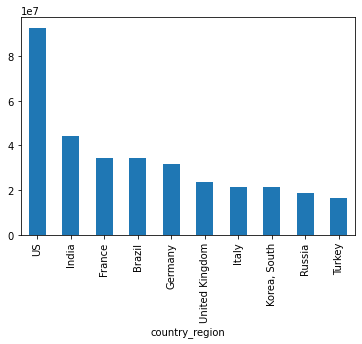

In [44]:
wrld_c.head(10).plot(kind='bar')

Dari informasi diatas kita bisa mengetahui jumlah kasus terkonfirmasi Covid-19 di seluruh dunia sebanyak 588.474.953 kasus.
5 Negara tertinggi adalah: US, India, France, Brazil, Germany.

In [29]:
# melakukan query untuk mengambil data deaths dari setiap negara dan membuat diagram batangnya.

wrld_d = df.query("date == '2022-08-11'").groupby('country_region')['deaths'].sum().sort_values(ascending=False)
wrld_d

country_region
US                      1036325.0
Brazil                   681006.0
India                    526928.0
Russia                   375192.0
Mexico                   328437.0
                          ...    
Marshall Islands              1.0
Antarctica                    0.0
Holy See                      0.0
Winter Olympics 2022          0.0
Summer Olympics 2020          0.0
Name: deaths, Length: 199, dtype: float64

In [40]:
wrld_d.sum()

6430692.0

<AxesSubplot:xlabel='country_region'>

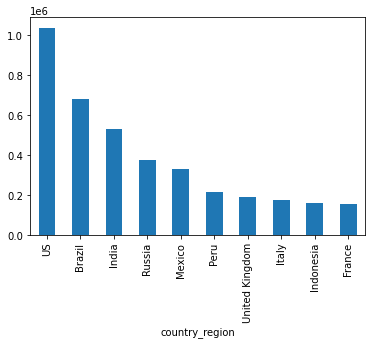

In [35]:
wrld_d.head(10).plot(kind='bar')

Dari informasi diatas kita bisa mengetahui jumlah kematian akibat Covid-19 di seluruh dunia sebanyak 6.430.692 jiwa.
5 Negara tertinggi adalah: US, Brazil, India, Russia, Mexico.

In [36]:
# melakukan query 2 kolom confirmed dan deaths lalu diurutkan berdasarkan kolom deaths dari yang terbesar

wrld_g = df.query("date == '2022-08-11'").groupby('country_region')[['confirmed', 'deaths']].sum().sort_values(by='deaths', ascending=False)
wrld_g

,confirmed,deaths
country_region,,
US,92719491.0,1036325.0
Brazil,34124579.0,681006.0
India,44223557.0,526928.0
Russia,18523028.0,375192.0
Mexico,6875708.0,328437.0
...,...,...
Marshall Islands,189.0,1.0
Antarctica,11.0,0.0
Holy See,29.0,0.0


<AxesSubplot:xlabel='country_region'>

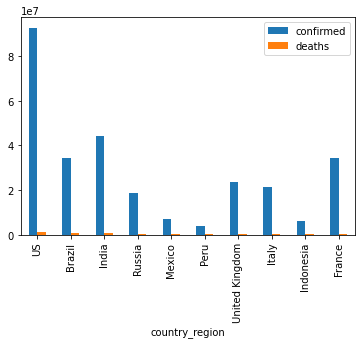

In [38]:
#membuat multiple bar plot menggunakan data confirmed dan death

wrld_g.head(10).plot.bar()

Dari grafik diatas kita bisa melihat sekilas bahwa Mexico, Peru, dan Indonesia adalah negara yang memiliki rasio kematian yang lebih tinggi jika dibandingkan dengan kasus terkonfirmasinya.

-------------------------------------------------------------------------------------------------------------------------------------------------

### Pada eksplorasi lanjutan ini akan lebih berfokus ke negara US karena case Covid-19 terbanyak berasal dari sana.

In [16]:
# melakukan query untuk mengambil data confirmed negara US, dan di-group berdasarkan states-nya.

usa_c = df.query("country_region == 'US' & date == '2022-08-11'").groupby('province_state')['confirmed'].sum().sort_values(ascending=False)
usa_c

province_state
California                  10865618.0
Texas                        7684975.0
Florida                      6901581.0
New York                     5895283.0
Illinois                     3617142.0
Pennsylvania                 3125967.0
North Carolina               3047625.0
Ohio                         3002043.0
Georgia                      2803517.0
Michigan                     2708622.0
New Jersey                   2631275.0
Tennessee                    2231854.0
Arizona                      2224964.0
Virginia                     1990841.0
Massachusetts                1987385.0
Indiana                      1854031.0
Wisconsin                    1801328.0
Washington                   1756800.0
South Carolina               1637108.0
Colorado                     1612702.0
Minnesota                    1611246.0
Missouri                     1586363.0
Kentucky                     1497314.0
Alabama                      1449812.0
Louisiana                    1398494.0
Maryland  

In [41]:
usa_c.sum()

92719491.0

<AxesSubplot:xlabel='province_state'>

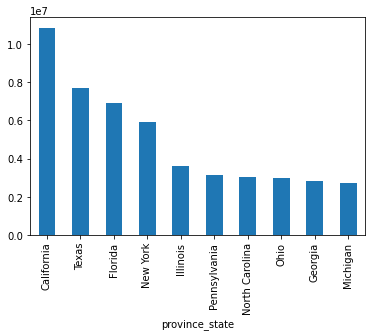

In [24]:
usa_c.head(10).plot(kind='bar')

Dari informasi diatas kita bisa mengetahui jumlah kasus terkonfirmasi Covid-19 di US sebanyak 92.719.491 kasus.
5 States tertinggi adalah: California, Texas, Florida, New York, dan Illnois.

In [17]:
# melakukan query untuk mengambil data deaths negara US, dan di-group berdasarkan states-nya.

usa_d = df.query("country_region == 'US' & date == '2022-08-11'").groupby('province_state')['deaths'].sum().sort_values(ascending=False)
usa_d

province_state
California                  93981.0
Texas                       89727.0
Florida                     78447.0
New York                    70658.0
Pennsylvania                46374.0
Georgia                     39319.0
Ohio                        39220.0
Illinois                    39079.0
Michigan                    37671.0
New Jersey                  34385.0
Arizona                     30901.0
Tennessee                   27190.0
North Carolina              25724.0
Indiana                     24222.0
Massachusetts               21285.0
Missouri                    21206.0
Virginia                    21126.0
Alabama                     20026.0
South Carolina              18215.0
Louisiana                   17690.0
Kentucky                    16514.0
Oklahoma                    16372.0
Maryland                    15053.0
Wisconsin                   14971.0
Washington                  13775.0
Minnesota                   13362.0
Colorado                    13073.0
Mississippi  

In [42]:
usa_d.sum()

1036325.0

<AxesSubplot:xlabel='province_state'>

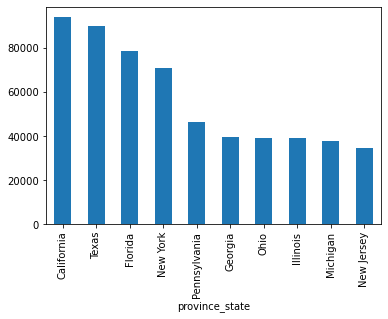

In [25]:
usa_d.head(10).plot(kind='bar')

Dari informasi diatas kita bisa mengetahui jumlah kematian akibat Covid-19 di US sebanyak 1.036.325 jiwa.
5 States tertinggi adalah: California, Texas, Florida, New York, dan Pennsylvania.

In [21]:
# Menghitung deaths/confirmed ratio

usa_dp = usa_d / usa_c
usa_dp.sort_values(ascending=False)

province_state
Grand Princess              0.029126
Pennsylvania                0.014835
Oklahoma                    0.014308
Mississippi                 0.014274
Georgia                     0.014025
Michigan                    0.013908
Arizona                     0.013888
New Mexico                  0.013831
Alabama                     0.013813
Nevada                      0.013659
Missouri                    0.013368
New Jersey                  0.013068
Indiana                     0.013065
Ohio                        0.013064
Connecticut                 0.012934
Arkansas                    0.012906
West Virginia               0.012717
Louisiana                   0.012649
Maryland                    0.012550
Tennessee                   0.012183
New York                    0.011986
Iowa                        0.011890
South Dakota                0.011740
Texas                       0.011676
Montana                     0.011652
Florida                     0.011367
South Carolina         

<AxesSubplot:xlabel='province_state'>

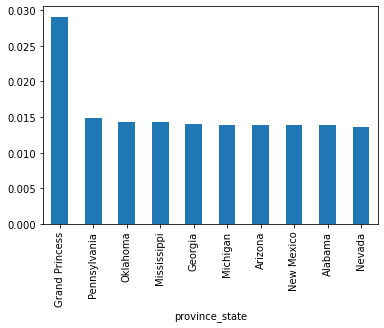

In [27]:
usa_dp.sort_values(ascending=False).head(10).plot(kind='bar')

Dari informasi diatas kita bisa mengetahui death/confirmed ratio dari Covid-19 di US berdasarkan States-nya. 5 States tertinggi adalah: Pennsylvania, Oklahoma, Mississippi, Georgia, dan Michigan.

Pengecualian untuk Grand Princess karena itu adalah cluster dari kapal pesiar dengan nama "Grand Princess" yang dilarang melanjutkan perjalanan dan harus karantina di California. Ini mungkin juga bisa menjelaskan mengapa death/confirmed ratio-nya bisa 2x lebih tinggi, karena para penumpangnya tidak boleh keluar dari kapal jadi mereka tidak bisa mendapatkan perawatan yang lebih intensif dan akses ke fasilitas medis yang lebih baik, hanya menggunakan fasilitas kesehatan di kapal yang mungkin jumlahnya juga terbatas.

# CONCLUSIONS

Dari eskplorasi-eksplorasi yang dilakukan pada data ini maka bisa diambil beberapa kesimpulan, yaitu:

- Jumlah kasus Covid-19 terkonfirmasi di seluruh dunia dari tanggal 22 Januari 2020 sampai dengan 11 Agustus 2022 sebanyak 588.474.953 kasus dan dengan jumlah korban meninggal dunia sebanyak 6.430.692 jiwa. Sekitar 7.4% penduduk dunia terdampak langsung oleh pandemi Covid-19 ini dan sekitar 1.1% dari kasus positif Covid-19 ini berakhir meninggal dunia.

- 5 Negara dengan kasus Covid-19 terbanyak adalah: 1. US, 2. India, 3. France, 4. Brazil, 5. Germany. 

- 5 Negara dengan jumlah kematian akibat Covid-19 terbanyak adalah: 1. US, 2. Brazil, 3. India, 4. Russia, 5. Mexico

- Jumlah kasus Covid-19 terkonfirmasi di US pada periode yang sama adalah sebanyak 92.719.491 sekitar 16% dari total kasus terkonfirmasi di seluruh dunia. Jumlah korban meninggal dunianya sebanyak 1.036.325 sekitar 16% dari jumlah korban akibat Covid-19 di seluruh dunia

- 5 States di US dengan kasus Covid-19 terbanyak adalah : 1. California, 2. Texas, 3. Florida, 4. New York, 5. Illinois

- 5 States di US dengan jumlah kematian akibat Covid-19 terbanyak adalah : 1. California, 2. Texas, 3. Florida, 4. New York, 5. Pennsylvania

- Berdasarkan data negara US terlihat bahwa jumlah kasus terkonfirmasi berbanding lurus dengan jumlah penduduk di setiap states-nya. Namun hal ini tidak berlaku pada data Dunia. Hal ini mungkin disebabkan adanya faktor-faktor lain seperti, jumlah tes yang dilakukan tiap negara pasti berbeda. Lalu adanya perbedaan standard penentuan konfirmasi Covid-19 di setiap negara, ada yang hanya dari tes Antigen ataupun harus dari tes PCR.

- Berdasarkan data negara US juga terlihat bahwa jumlah angka kematian berbanding lurus dengan kasus terkonfirmasinya. Namun hal ini kembali berbeda kondisinya pada data Dunia. Hal ini mungkin disebabkan oleh faktor-faktor seperti, jumlah tenaga medis & fasilitas kesehatan di tiap negara yang kondisinya tidak sama. Serta kebijakan-kebijakan yang dikeluarkan setiap negara untuk penanggulangan pandemi Covid-19 juga pasti berbeda. 




 